Filename: legac_M16_41325_v3.0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     159   ()      
  1  PHASE3SPECTRA    1 BinTableHDU     45   1R x 4C   [6166E, 6166D, 6166D, 6166I]   
None
Ancho equivalente: 14.34 Angstrom
Flujo integrado de la línea [O III] 5007: 3.804e-16 erg/cm²/s


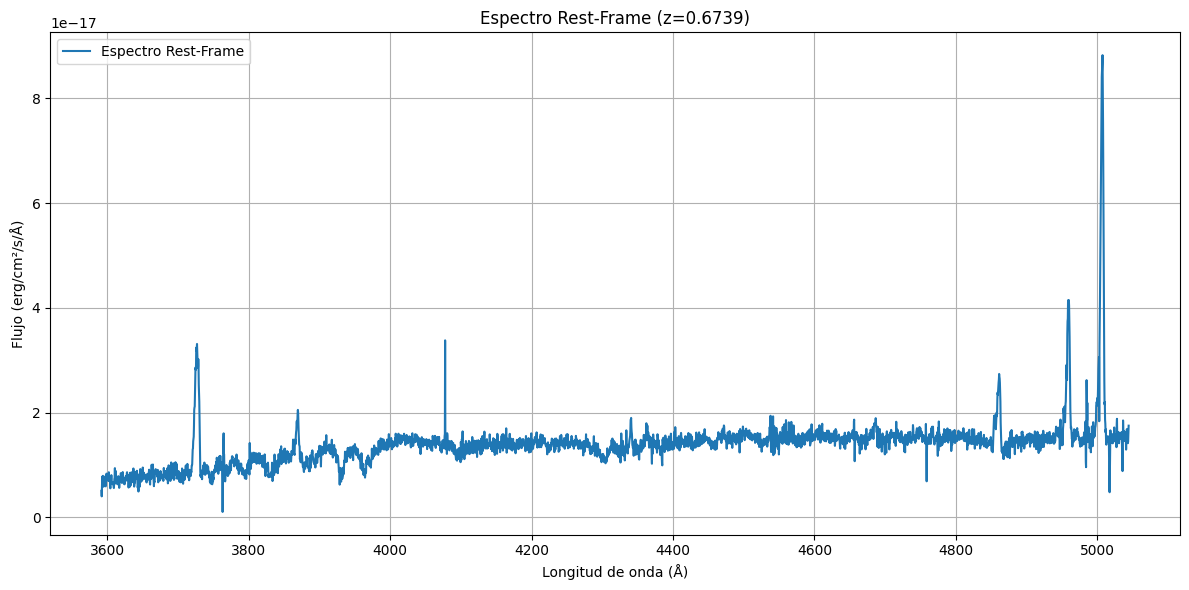

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from specutils import Spectrum1D
from specutils.analysis import equivalent_width
from specutils.spectra import SpectralRegion

# Archivo FITS
fits_file = "legac_M16_41325_v3.0.fits"

# Corrimiento al rojo (redshift) del objeto
z = 0.6739

# Factor de calibración (común en espectros de LEGA-C: 1e-19 erg/cm²/s/Å)
FACTOR_CALIBRACION = 1e-19

# Abrir archivo y leer espectro
with fits.open(fits_file) as hdul:
    print(hdul.info())
    data = hdul[1].data

    espectro_id = 0
    espectro = data[espectro_id]

    longitud_de_onda_obs = espectro['WAVE']
    intensidad = espectro['FLUX'] * FACTOR_CALIBRACION  # Escalar el flujo

# Calcular longitud de onda en rest-frame
longitud_de_onda_rest = longitud_de_onda_obs / (1 + z)

# Crear el espectro en reposo
spectrum_rest = Spectrum1D(spectral_axis=longitud_de_onda_rest * u.AA,
                           flux=intensidad * u.Unit("erg cm-2 s-1 Å-1"))

# -------------------- Medición del ancho equivalente --------------------
region = SpectralRegion(5000 * u.AA, 5014 * u.AA)
ew = equivalent_width(spectrum_rest, regions=region)
print(f"Ancho equivalente: {ew:.2f}")

# -------------------- Medición del flujo integrado --------------------
# Parámetros de la línea [O III] 5007
linea_central = 5007
ventana_linea = 10  # +/-10 Å
linea_min = linea_central - ventana_linea
linea_max = linea_central + ventana_linea

# Ventanas laterales para estimar el continuo
continuo_izq_min = linea_min - 20
continuo_izq_max = linea_min - 5
continuo_der_min = linea_max + 5
continuo_der_max = linea_max + 20

# Extraer arrays del espectro en reposo
longitud_de_onda = spectrum_rest.spectral_axis.value  # en Å
flujo = spectrum_rest.flux.value  # en erg/cm²/s/Å

# Crear máscaras para las regiones
mask_linea = (longitud_de_onda >= linea_min) & (longitud_de_onda <= linea_max)
mask_cont_izq = (longitud_de_onda >= continuo_izq_min) & (longitud_de_onda <= continuo_izq_max)
mask_cont_der = (longitud_de_onda >= continuo_der_min) & (longitud_de_onda <= continuo_der_max)

# Estimar el continuo
cont_izq = np.mean(flujo[mask_cont_izq])
cont_der = np.mean(flujo[mask_cont_der])
cont_prom = (cont_izq + cont_der) / 2

# Restar el continuo y calcular el flujo neto de la línea
flujo_linea = flujo[mask_linea] - cont_prom
flujo_integrado = np.trapz(flujo_linea, longitud_de_onda[mask_linea])  # erg/cm²/s

print(f"Flujo integrado de la línea [O III] 5007: {flujo_integrado:.3e} erg/cm²/s")

# -------------------- Graficar espectro --------------------
plt.figure(figsize=(12, 6))
plt.plot(longitud_de_onda, flujo, label='Espectro Rest-Frame')
plt.xlabel("Longitud de onda (Å)")
plt.ylabel("Flujo (erg/cm²/s/Å)")
plt.title(f"Espectro Rest-Frame (z={z})")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("41325.jpg", dpi=300)
plt.show()


Filename: legac_M7_157147_v3.0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     123   ()      
  1  PHASE3SPECTRA    1 BinTableHDU     45   1R x 4C   [6166E, 6166D, 6166D, 6166I]   
None
Flujo integrado línea [O III] 5007: 5.066e-16 erg/cm²/s
Ancho equivalente EW [O III] 5007 (manual): -33.78 Å
Flujo integrado línea Hβ 4861: 7.758e-17 erg/cm²/s
Ancho equivalente EW Hβ 4861 (manual): -5.30 Å


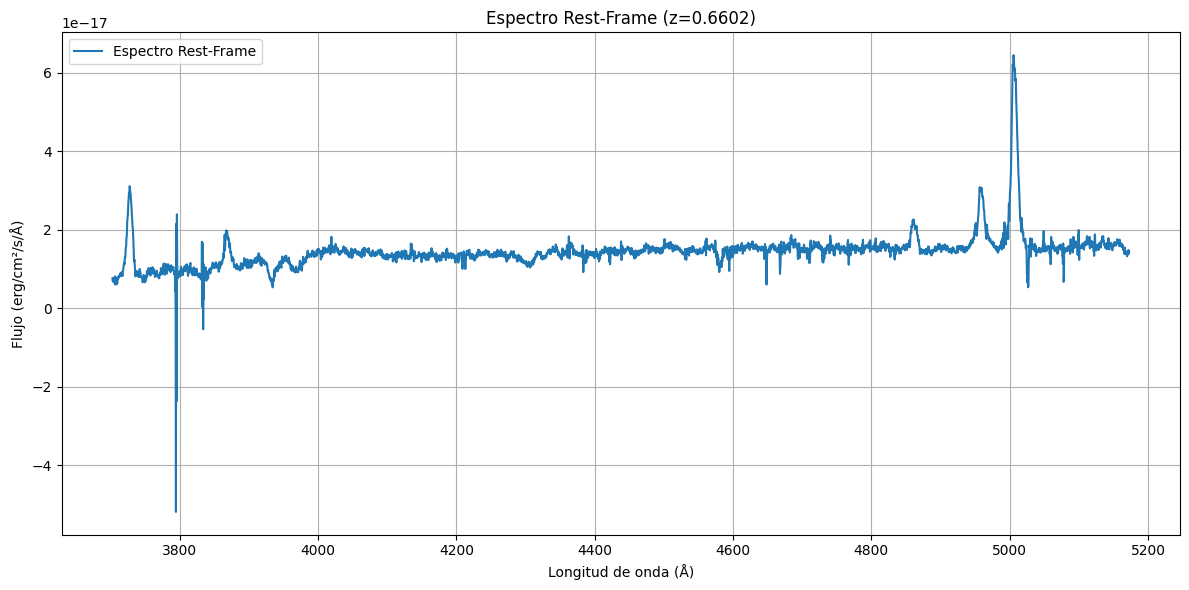

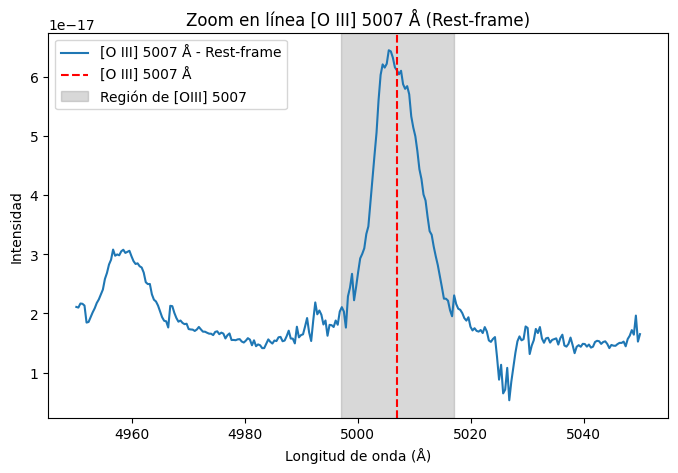

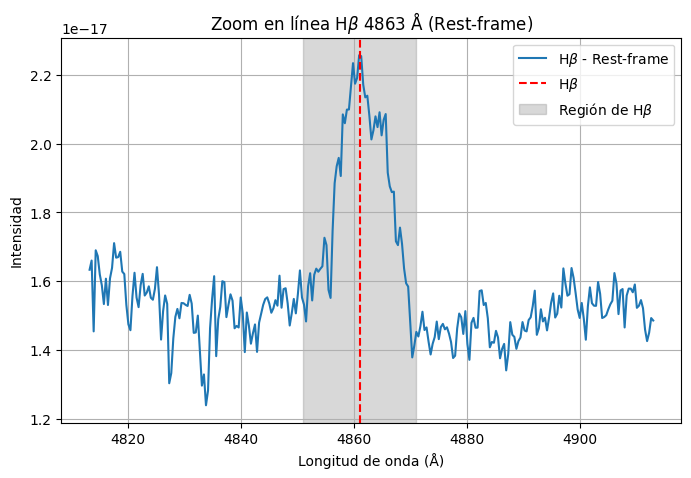

In [16]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from specutils import Spectrum1D
from specutils.analysis import equivalent_width
from specutils.spectra import SpectralRegion

# Archivo FITS
#fits_file = "legac_M16_41325_v3.0.fits"
fits_file ="legac_M7_157147_v3.0.fits"
# Corrimiento al rojo (redshift) del objeto
#z = 0.6739
z = 0.6602

# Factor de calibración (común en espectros de LEGA-C: 1e-19 erg/cm²/s/Å)
FACTOR_CALIBRACION = 1e-19

# Abrir archivo y leer espectro
with fits.open(fits_file) as hdul:
    print(hdul.info())
    data = hdul[1].data

    espectro_id = 0
    espectro = data[espectro_id]

    longitud_de_onda_obs = espectro['WAVE']
    intensidad = espectro['FLUX'] * FACTOR_CALIBRACION  # Escalar el flujo

# Calcular longitud de onda en rest-frame
longitud_de_onda_rest = longitud_de_onda_obs / (1 + z)

# Crear el espectro en reposo con unidades
spectrum_rest = Spectrum1D(spectral_axis=longitud_de_onda_rest * u.AA,
                           flux=intensidad * u.Unit("erg cm-2 s-1 Å-1"))

# Función para calcular EW manualmente
def calcular_ew_manual(wave, flux, cont_prom):
    """
    Calcular ancho equivalente manualmente:
    EW = ∫ (1 - Fλ/Fc) dλ
    """
    flux_norm = flux / cont_prom
    ew_manual = np.trapz(1 - flux_norm, wave)
    return ew_manual

# --- Medición para [O III] 5007 ---

# Definir región para EW con specutils
region_oiii = SpectralRegion(4990 * u.AA, 5024 * u.AA)
ew_oiii = equivalent_width(spectrum_rest, regions=region_oiii)
#print(f"Ancho equivalente EW [O III] 5007 (specutils): {ew_oiii:.2f} Å")

# Definir ventanas para flujo y continuo
linea_central_oiii = 5007
ventana_linea = 10  # +/-10 Å
linea_min_oiii = linea_central_oiii - ventana_linea
linea_max_oiii = linea_central_oiii + ventana_linea

continuo_izq_min_oiii = linea_min_oiii - 20
continuo_izq_max_oiii = linea_min_oiii - 5
continuo_der_min_oiii = linea_max_oiii + 5
continuo_der_max_oiii = linea_max_oiii + 20

longitud_de_onda = spectrum_rest.spectral_axis.value
flujo = spectrum_rest.flux.value

mask_linea_oiii = (longitud_de_onda >= linea_min_oiii) & (longitud_de_onda <= linea_max_oiii)
mask_cont_izq_oiii = (longitud_de_onda >= continuo_izq_min_oiii) & (longitud_de_onda <= continuo_izq_max_oiii)
mask_cont_der_oiii = (longitud_de_onda >= continuo_der_min_oiii) & (longitud_de_onda <= continuo_der_max_oiii)

cont_izq_oiii = np.mean(flujo[mask_cont_izq_oiii])
cont_der_oiii = np.mean(flujo[mask_cont_der_oiii])
cont_prom_oiii = (cont_izq_oiii + cont_der_oiii) / 2

flujo_linea_oiii = flujo[mask_linea_oiii] - cont_prom_oiii
flujo_integrado_oiii = np.trapz(flujo_linea_oiii, longitud_de_onda[mask_linea_oiii])

print(f"Flujo integrado línea [O III] 5007: {flujo_integrado_oiii:.3e} erg/cm²/s")

# Calcular EW manual para [O III]
ew_manual_oiii = calcular_ew_manual(longitud_de_onda[mask_linea_oiii],
                                    flujo[mask_linea_oiii],
                                    cont_prom_oiii)
print(f"Ancho equivalente EW [O III] 5007 (manual): {ew_manual_oiii:.2f} Å")

# --- Medición para Hβ 4861 ---

region_hb = SpectralRegion(4841 * u.AA, 4881 * u.AA)
ew_hb = equivalent_width(spectrum_rest, regions=region_hb)
#print(f"Ancho equivalente EW Hβ 4861 (specutils): {ew_hb:.2f} Å")

linea_central_hb = 4861
linea_min_hb = linea_central_hb - ventana_linea
linea_max_hb = linea_central_hb + ventana_linea

continuo_izq_min_hb = linea_min_hb - 20
continuo_izq_max_hb = linea_min_hb - 5
continuo_der_min_hb = linea_max_hb + 5
continuo_der_max_hb = linea_max_hb + 20

mask_linea_hb = (longitud_de_onda >= linea_min_hb) & (longitud_de_onda <= linea_max_hb)
mask_cont_izq_hb = (longitud_de_onda >= continuo_izq_min_hb) & (longitud_de_onda <= continuo_izq_max_hb)
mask_cont_der_hb = (longitud_de_onda >= continuo_der_min_hb) & (longitud_de_onda <= continuo_der_max_hb)

cont_izq_hb = np.mean(flujo[mask_cont_izq_hb])
cont_der_hb = np.mean(flujo[mask_cont_der_hb])
cont_prom_hb = (cont_izq_hb + cont_der_hb) / 2

flujo_linea_hb = flujo[mask_linea_hb] - cont_prom_hb
flujo_integrado_hb = np.trapz(flujo_linea_hb, longitud_de_onda[mask_linea_hb])

print(f"Flujo integrado línea Hβ 4861: {flujo_integrado_hb:.3e} erg/cm²/s")

# Calcular EW manual para Hβ
ew_manual_hb = calcular_ew_manual(longitud_de_onda[mask_linea_hb],
                                 flujo[mask_linea_hb],
                                 cont_prom_hb)
print(f"Ancho equivalente EW Hβ 4861 (manual): {ew_manual_hb:.2f} Å")

# --- Graficar espectro rest-frame ---
plt.figure(figsize=(12, 6))
plt.plot(longitud_de_onda, flujo, label='Espectro Rest-Frame')
plt.xlabel("Longitud de onda (Å)")
plt.ylabel("Flujo (erg/cm²/s/Å)")
plt.title(f"Espectro Rest-Frame (z={z})")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("41325.jpg", dpi=300)
plt.show()


# -------------------- Visualización -----5007---------------

# Zoom en la línea [O III] 5007 Å en rest-frame
zoom_min_rest = 4950
zoom_max_rest = 5050

mask_zoom = (longitud_de_onda_rest >= zoom_min_rest) & (longitud_de_onda_rest <= zoom_max_rest)
longitud_zoom = longitud_de_onda_rest[mask_zoom]
intensidad_zoom = intensidad[mask_zoom]


subspec = extract_region(spectrum_rest, region)

plt.figure(figsize=(8, 5))

plt.plot(longitud_zoom, intensidad_zoom, label="[O III] 5007 Å - Rest-frame")
plt.axvline(5007, color='red', linestyle='--', label="[O III] 5007 Å")
plt.axvspan(4997, 5017, color='gray', alpha=0.3, label='Región de [OIII] 5007')

plt.xlabel("Longitud de onda (Å)")
plt.ylabel("Intensidad")
plt.title("Zoom en línea [O III] 5007 Å (Rest-frame)")
plt.legend()


# -------------------- Visualización -----4863---------------

zoom_min_rest = 4813
zoom_max_rest = 4913

mask_zoom = (longitud_de_onda_rest >= zoom_min_rest) & (longitud_de_onda_rest <= zoom_max_rest)
longitud_zoom = longitud_de_onda_rest[mask_zoom]
intensidad_zoom = intensidad[mask_zoom]

subspec = extract_region(spectrum_rest, region)

plt.figure(figsize=(8, 5))

plt.plot(longitud_zoom, intensidad_zoom, label=r"H$\beta$ - Rest-frame")
plt.axvline(4861, color='red', linestyle='--', label=r"H$\beta$")
plt.axvspan(4851, 4871, color='gray', alpha=0.3, label=r'Región de H$\beta$')

plt.xlabel("Longitud de onda (Å)")
plt.ylabel("Intensidad")
plt.title(r"Zoom en línea H$\beta$ 4863 Å (Rest-frame)")
plt.legend()



plt.grid()
plt.show()





Filename: legac_M20_89284_v3.0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     158   ()      
  1  PHASE3SPECTRA    1 BinTableHDU     45   1R x 4C   [6166E, 6166D, 6166D, 6166I]   
None
Ancho equivalente EW [O III] 5007: 20.19 Angstrom Å
Flujo integrado de la línea [O III] 5007: 6.601e-17 erg/cm²/s
FWHM [O III] 5007: 4.75 Å, 284.54 km/s
Ancho equivalente EW Hβ 4861: 20.19 Angstrom Å
Flujo integrado de la línea Hβ 4861: 4.504e-17 erg/cm²/s
FWHM Hβ 4861: 2.58 Å, 159.09 km/s


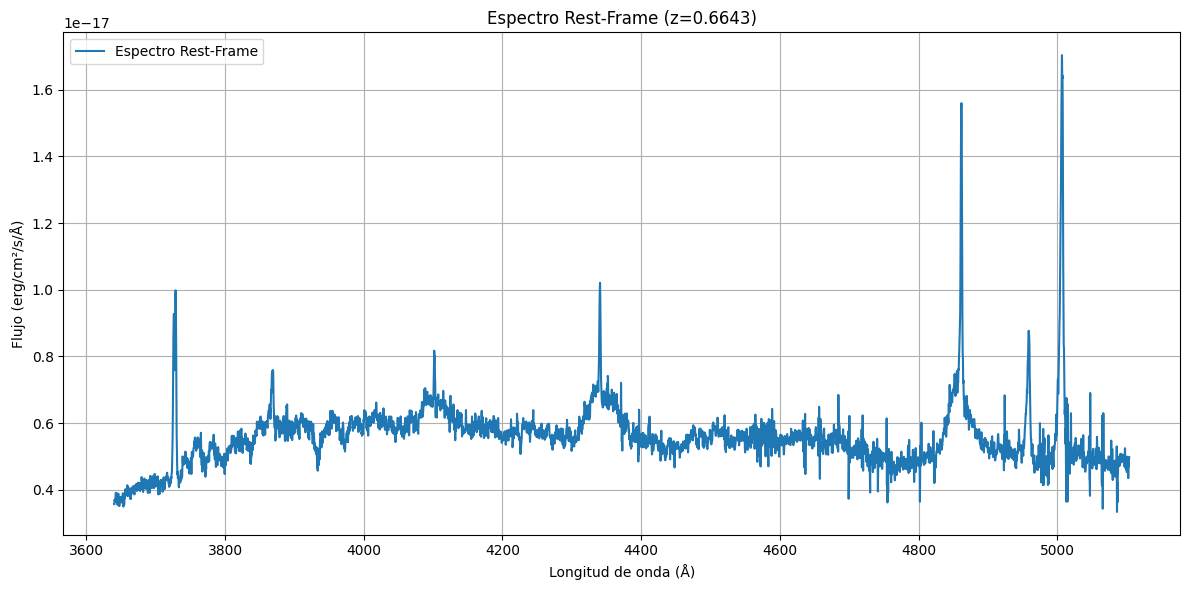

In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from specutils import Spectrum1D
from specutils.analysis import equivalent_width
from specutils.spectra import SpectralRegion

from astropy.modeling import models, fitting

# Archivo FITS
#fits_file = "legac_M16_41325_v3.0.fits"
#fits_file = "legac_M7_157147_v3.0.fits"
fits_file ="legac_M20_89284_v3.0.fits"

# Corrimiento al rojo (redshift) del objeto
#z = 0.6739
#z = 0.6602
z = 0.6643

# Factor de calibración (común en espectros de LEGA-C: 1e-19 erg/cm²/s/Å)
FACTOR_CALIBRACION = 1e-19

# --- Función para medir FWHM con ajuste gaussiano ---
def medir_fwhm_gaussiana(longitud, flujo, centro, ventana=20):
    """
    Mide el FWHM de una línea espectral centrada en `centro` (Å)
    en un espectro dado por longitud (Å) y flujo (cualquier unidad).
    Ajusta una gaussiana local en ventana ±ventana Å alrededor del centro.
    Retorna FWHM en Å y km/s, y parámetros del ajuste.
    """
    c = 299792.458  # km/s velocidad de la luz

    # Seleccionar datos en la ventana
    idx = (longitud > centro - ventana) & (longitud < centro + ventana)
    x = longitud[idx]
    y = flujo[idx]

    if len(x) == 0:
        raise ValueError(f"No hay datos en la ventana para la línea en {centro} Å.")

    # Estimar y sustraer continuo local (mediana)
    continuo = np.median(y)
    y_corr = y - continuo

    # Filtrar valores no finitos (nan, inf)
    mask = np.isfinite(x) & np.isfinite(y_corr)
    x = x[mask]
    y_corr = y_corr[mask]

    if len(x) == 0:
        raise ValueError(f"No quedan datos finitos para ajustar la línea en {centro} Å.")

    # Ajuste gaussiano inicial
    g_init = models.Gaussian1D(amplitude=np.max(y_corr), mean=centro, stddev=2.0)
    fitter = fitting.LevMarLSQFitter()
    g_fit = fitter(g_init, x, y_corr)

    fwhm_aa = 2.3548 * g_fit.stddev.value  # FWHM en Angstroms
    fwhm_kms = (fwhm_aa / centro) * c      # FWHM en km/s

    return {
        "fwhm_aa": fwhm_aa,
        "fwhm_kms": fwhm_kms,
        "amplitud": g_fit.amplitude.value,
        "mean": g_fit.mean.value,
        "stddev": g_fit.stddev.value,
        "continuo": continuo
    }


# Abrir archivo y leer espectro
with fits.open(fits_file) as hdul:
    print(hdul.info())
    data = hdul[1].data

    espectro_id = 0
    espectro = data[espectro_id]

    longitud_de_onda_obs = espectro['WAVE']
    intensidad = espectro['FLUX'] * FACTOR_CALIBRACION  # Escalar el flujo

# Calcular longitud de onda en rest-frame
longitud_de_onda_rest = longitud_de_onda_obs / (1 + z)

# Crear el espectro en reposo
spectrum_rest = Spectrum1D(spectral_axis=longitud_de_onda_rest * u.AA,
                           flux=intensidad * u.Unit("erg cm-2 s-1 Å-1"))

# Extraer arrays para trabajar directo
longitud_de_onda = spectrum_rest.spectral_axis.value
flujo = spectrum_rest.flux.value

# --- Medición EW y flujo para [O III] 5007 ---
region_oiii = SpectralRegion(4997 * u.AA, 5017 * u.AA)  # ventana 20 Å centrada en 5007
ew_oiii = equivalent_width(spectrum_rest, regions=region_oiii)
print(f"Ancho equivalente EW [O III] 5007: {ew_oiii:.2f} Å")

# Continuo para [O III] 5007
linea_central_oiii = 5007
ventana_linea = 10  # ±10 Å
linea_min_oiii = linea_central_oiii - ventana_linea
linea_max_oiii = linea_central_oiii + ventana_linea

continuo_izq_min_oiii = linea_min_oiii - 20
continuo_izq_max_oiii = linea_min_oiii - 5
continuo_der_min_oiii = linea_max_oiii + 5
continuo_der_max_oiii = linea_max_oiii + 20

mask_linea_oiii = (longitud_de_onda >= linea_min_oiii) & (longitud_de_onda <= linea_max_oiii)
mask_cont_izq_oiii = (longitud_de_onda >= continuo_izq_min_oiii) & (longitud_de_onda <= continuo_izq_max_oiii)
mask_cont_der_oiii = (longitud_de_onda >= continuo_der_min_oiii) & (longitud_de_onda <= continuo_der_max_oiii)

cont_izq_oiii = np.mean(flujo[mask_cont_izq_oiii])
cont_der_oiii = np.mean(flujo[mask_cont_der_oiii])
cont_prom_oiii = (cont_izq_oiii + cont_der_oiii) / 2

flujo_linea_oiii = flujo[mask_linea_oiii] - cont_prom_oiii
flujo_integrado_oiii = np.trapz(flujo_linea_oiii, longitud_de_onda[mask_linea_oiii])

print(f"Flujo integrado de la línea [O III] 5007: {flujo_integrado_oiii:.3e} erg/cm²/s")

# Medir FWHM de [O III]
fwhm_oiii = medir_fwhm_gaussiana(longitud_de_onda, flujo, linea_central_oiii, ventana=20)
print(f"FWHM [O III] 5007: {fwhm_oiii['fwhm_aa']:.2f} Å, {fwhm_oiii['fwhm_kms']:.2f} km/s")

# --- Medición EW y flujo para Hβ 4861 ---
region_hb = SpectralRegion(4851 * u.AA, 4871 * u.AA)  # ventana 20 Å centrada en 4861
ew_hb = equivalent_width(spectrum_rest, regions=region_hb)
print(f"Ancho equivalente EW Hβ 4861: {ew_hb:.2f} Å")

linea_central_hb = 4861
linea_min_hb = linea_central_hb - ventana_linea
linea_max_hb = linea_central_hb + ventana_linea

continuo_izq_min_hb = linea_min_hb - 20
continuo_izq_max_hb = linea_min_hb - 5
continuo_der_min_hb = linea_max_hb + 5
continuo_der_max_hb = linea_max_hb + 20

mask_linea_hb = (longitud_de_onda >= linea_min_hb) & (longitud_de_onda <= linea_max_hb)
mask_cont_izq_hb = (longitud_de_onda >= continuo_izq_min_hb) & (longitud_de_onda <= continuo_izq_max_hb)
mask_cont_der_hb = (longitud_de_onda >= continuo_der_min_hb) & (longitud_de_onda <= continuo_der_max_hb)

cont_izq_hb = np.mean(flujo[mask_cont_izq_hb])
cont_der_hb = np.mean(flujo[mask_cont_der_hb])
cont_prom_hb = (cont_izq_hb + cont_der_hb) / 2

flujo_linea_hb = flujo[mask_linea_hb] - cont_prom_hb
flujo_integrado_hb = np.trapz(flujo_linea_hb, longitud_de_onda[mask_linea_hb])

print(f"Flujo integrado de la línea Hβ 4861: {flujo_integrado_hb:.3e} erg/cm²/s")

# Medir FWHM de Hβ
fwhm_hb = medir_fwhm_gaussiana(longitud_de_onda, flujo, linea_central_hb, ventana=20)
print(f"FWHM Hβ 4861: {fwhm_hb['fwhm_aa']:.2f} Å, {fwhm_hb['fwhm_kms']:.2f} km/s")

# --- Graficar espectro rest-frame ---
plt.figure(figsize=(12, 6))
plt.plot(longitud_de_onda, flujo, label='Espectro Rest-Frame')
plt.xlabel("Longitud de onda (Å)")
plt.ylabel("Flujo (erg/cm²/s/Å)")
plt.title(f"Espectro Rest-Frame (z={z})")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("41325.jpg", dpi=300)
plt.show()

# --- Zoom en líneas ---
def plot_zoom_linea(longitud, flujo, centro, region_min, region_max, etiqueta_linea):
    mask_zoom = (longitud >= region_min) & (longitud <= region_max)
    plt.figure(figsize=(8, 5))
    plt.plot(longitud[mask_zoom], flujo[mask_zoom], label=f"{etiqueta_linea} - Rest-frame")
    plt.axvline(centro, color='red', linestyle='--', label=f"{etiqueta_linea}")
    plt.axvspan(region_min, region_max, color='gray', alpha=0.3, label=f'Región de {etiqueta_linea}')
    plt.xlabel("Longitud de onda (Å)")
    plt.ylabel("Intensidad")
    plt.title(f"Zoom en línea {etiqueta_linea} ({centro} Å) Rest-frame")
    plt.legend()
    plt.grid()
    plt.show()


